In [1]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('Homestays_Data(in).csv')
# Converting date columns to datetime
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])
# Calculating Host_Tenure
current_date = datetime.now()
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365.25
# Calculating Amenities_Count
df['Amenities_Count'] = df['amenities'].apply(lambda x: x.count(',') + 1)
# Calculating Days_Since_Last_Review
df['Days_Since_Last_Review'] = (current_date - df['last_review']).dt.days
print(df)


             id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Ai

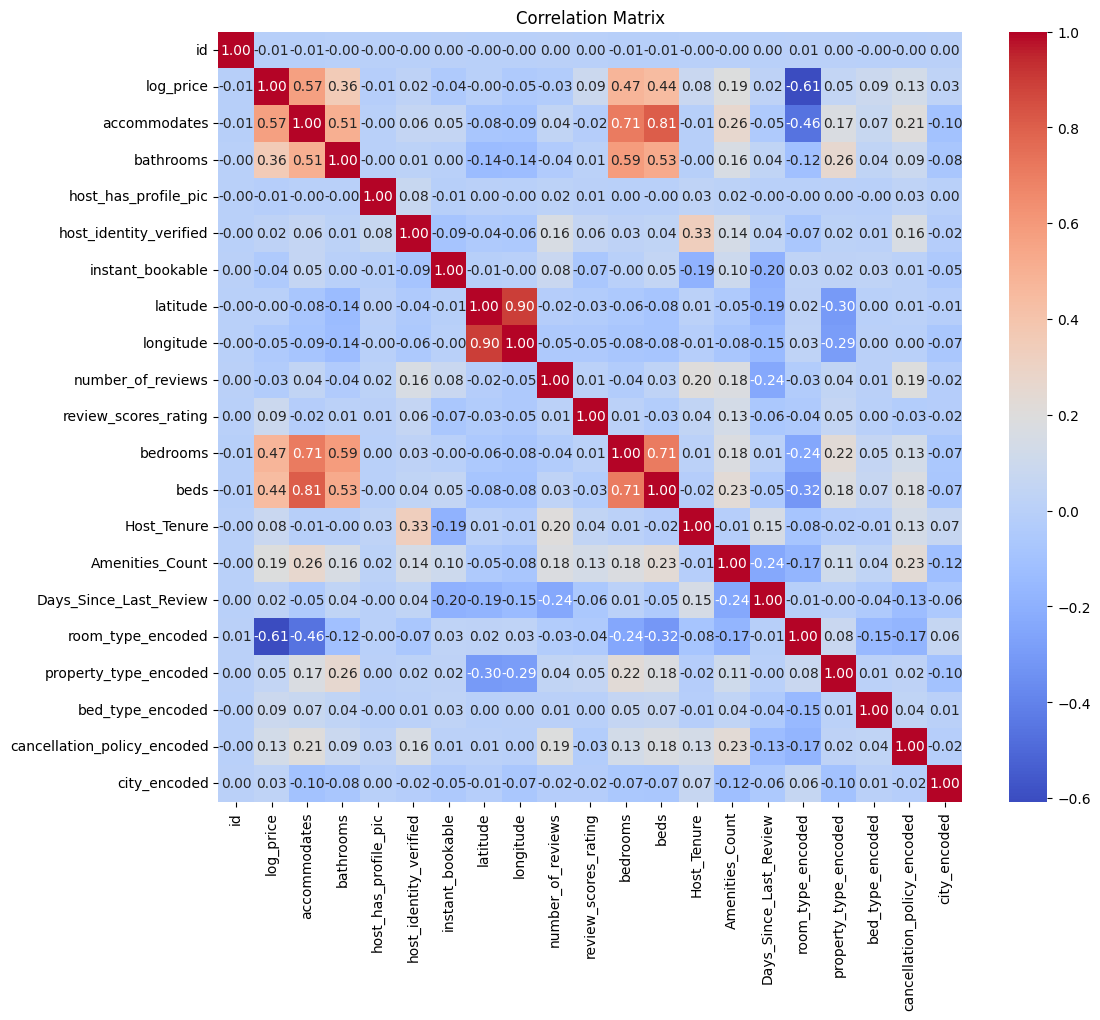

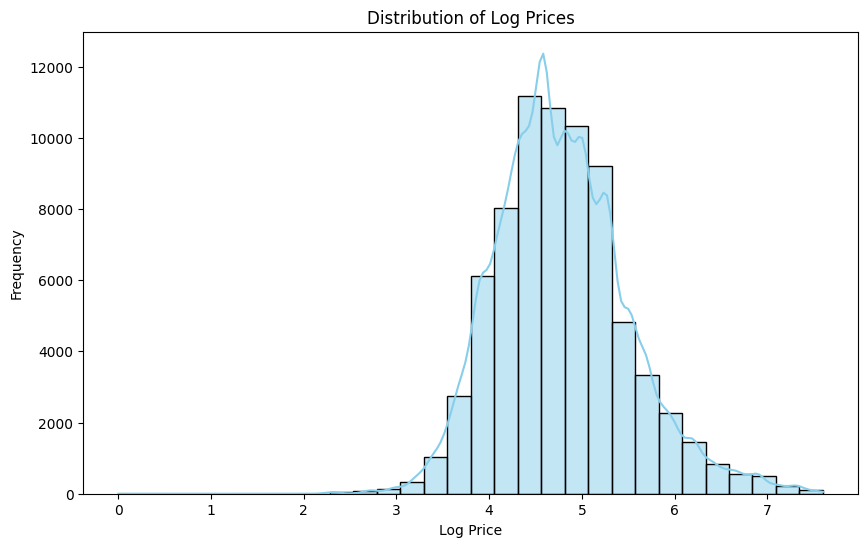

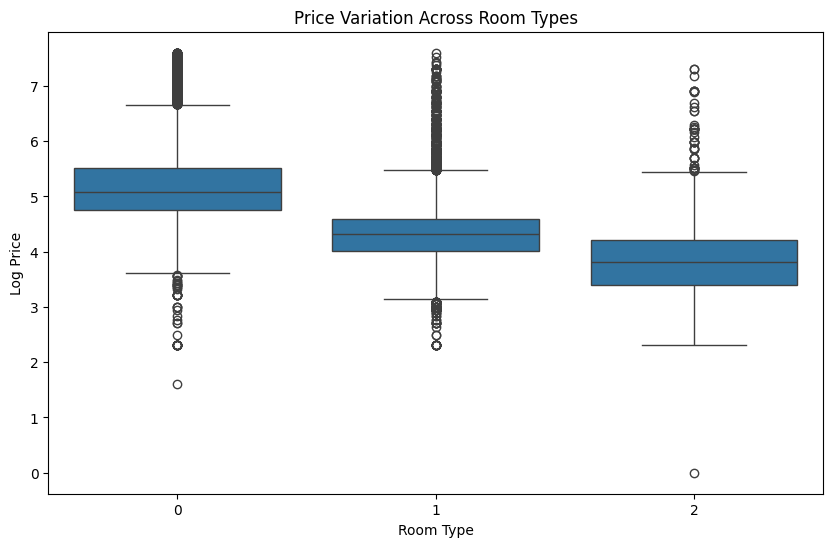

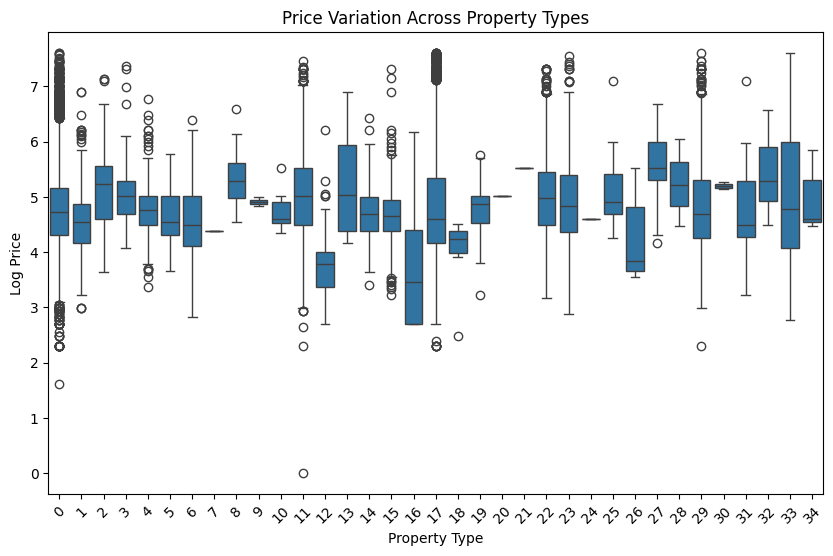

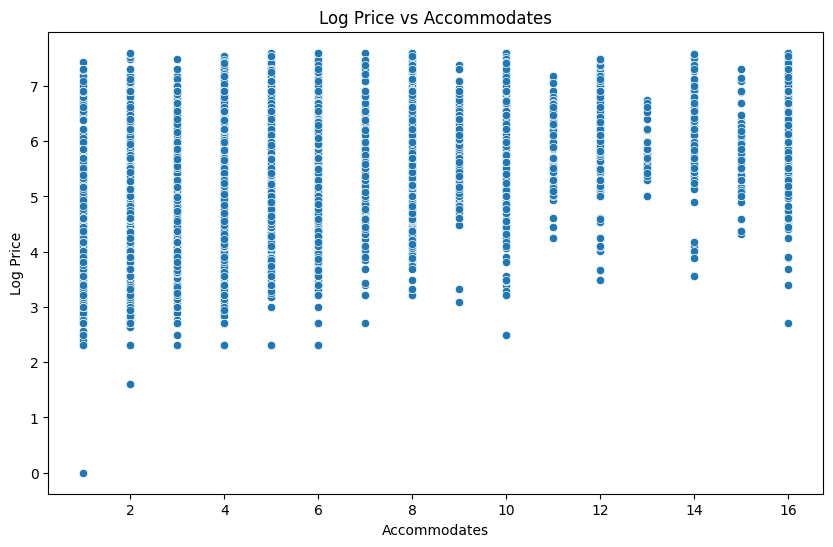

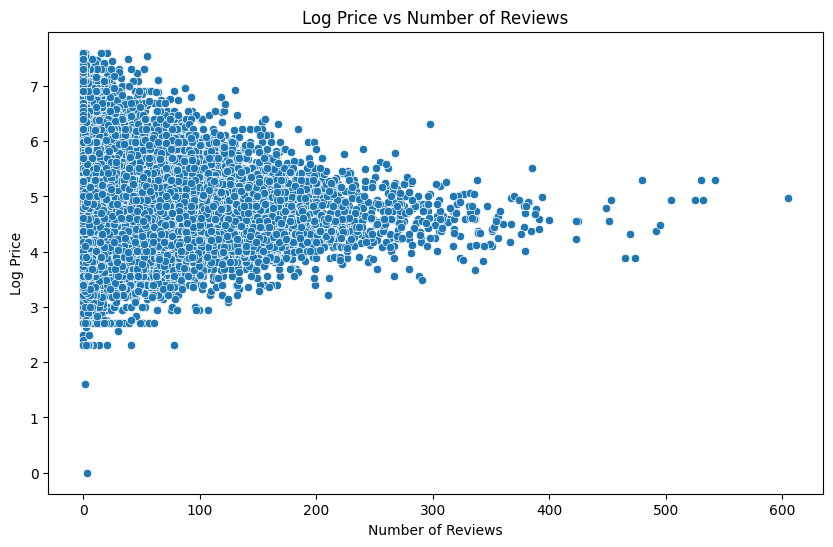

In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
# Converting features with 't' and 'f' to '1' and '0'
binary_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
df[binary_cols] = df[binary_cols].replace({'t': 1, 'f': 0})
# Label encoding for Task 6 done here
label_encoder = LabelEncoder()
categorical_cols = ['room_type', 'property_type', 'bed_type', 'cancellation_policy', 'city']
for col in categorical_cols:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])
# Selecting numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Correlation Analysis
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()
# Categorical Feature Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type_encoded', y='log_price', data=df)
plt.title('Price Variation Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type_encoded', y='log_price', data=df)
plt.title('Price Variation Across Property Types')
plt.xlabel('Property Type')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.title('Log Price vs Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Log Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='log_price', data=df)
plt.title('Log Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.show()


In [3]:
print(df.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review',
       'room_type_encoded', 'property_type_encoded', 'bed_type_encoded',
       'cancellation_policy_encoded', 'city_encoded'],
      dtype='object')


In [4]:
#Task 3: Geospatial Analysis
import folium
from folium.plugins import MarkerCluster
# Taking the relevant columns
df_geo = df[['latitude', 'longitude', 'log_price', 'neighbourhood']]

# Creating a map centered around the mean latitude and longitude
mean_lat = df_geo['latitude'].mean()
mean_lon = df_geo['longitude'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)
# Creating marker clusters
marker_cluster = MarkerCluster().add_to(m)
# Adding markers to the map
for index, row in df_geo.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"Neighbourhood: {row['neighbourhood']}<br>Log Price: {row['log_price']}").add_to(marker_cluster)
m.save('listings_map.html')
m
# Gives us the map (not able to print here in google colab might have to open the html file)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


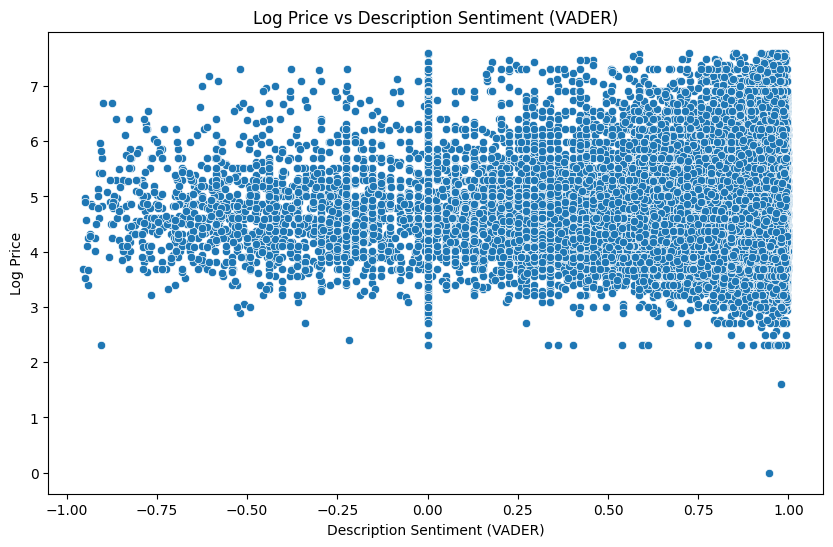

In [5]:
#Task 4: Sentiment analysis on Textual data (uses pre-existing model VADER)
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()
def analyze_sentiment_vader(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    return sentiment_score
df['description_sentiment_vader'] = df['description'].apply(analyze_sentiment_vader)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='description_sentiment_vader', y='log_price', data=df)
plt.title('Log Price vs Description Sentiment (VADER)')
plt.xlabel('Description Sentiment (VADER)')
plt.ylabel('Log Price')
plt.show()

In [6]:
print(df.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review',
       'room_type_encoded', 'property_type_encoded', 'bed_type_encoded',
       'cancellation_policy_encoded', 'city_encoded',
       'description_sentiment_vader'],
      dtype='object')


In [7]:
import re

def parse_amenities(amenities_string):
    amenities = re.findall(r'"([^"]*)"', amenities_string)
    return amenities
df['parsed_amenities'] = df['amenities'].apply(parse_amenities)
# Creating a list of all unique amenities
all_amenities = set()
for amenities_list in df['parsed_amenities']:
    all_amenities.update(amenities_list)

for amenity in all_amenities:
    df[amenity] = df['parsed_amenities'].apply(lambda x: 1 if amenity in x else 0)


<ipython-input-7-1837eb05073a>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['parsed_amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-7-1837eb05073a>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['parsed_amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-7-1837eb05073a>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import pearsonr

df['parsed_amenities'] = df['amenities'].apply(parse_amenities)
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(mlb.fit_transform(df['parsed_amenities']), columns=mlb.classes_)
df_amenities = pd.concat([df[['log_price']], amenities_encoded], axis=1)

amenities_corr = df_amenities.corr()['log_price'].drop('log_price')
amenities_corr_sorted = amenities_corr.sort_values(ascending=False)

# Top amenities
print("Top Amenities Correlated with Log Price:")
print(amenities_corr_sorted.head(10))
# Bottom amenities
print("\nBottom Amenities Correlated with Log Price:")
print(amenities_corr_sorted.tail(10))


Top Amenities Correlated with Log Price:
Family/kid friendly          0.290455
Cable TV                     0.237680
Indoor fireplace             0.170569
Hair dryer                   0.117526
Suitable for events          0.115668
Private entrance             0.114143
24-hour check-in             0.110392
Laptop friendly workspace    0.092137
Self Check-In                0.088641
Pets allowed                 0.083615
Name: log_price, dtype: float64

Bottom Amenities Correlated with Log Price:
Other pet(s)                                 -0.006269
Grab-rails for shower and toilet             -0.006272
Free parking on street                       -0.019793
Host greets you                              -0.033957
Private living room                          -0.050782
Smoking allowed                              -0.067840
Pets live on this property                   -0.098428
Lock on bedroom door                         -0.134251
translation missing: en.hosting_amenity_50   -0.208891
transla

In [9]:
print(df.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee',
       ...
       'Washer / Dryer', 'Hand or paper towel', 'Babysitter recommendations',
       'Baby monitor', 'Elevator in building', 'Hot water', 'Stair gates',
       'Flat, smooth pathway to front door', 'Single level home',
       'Indoor fireplace'],
      dtype='object', length=138)


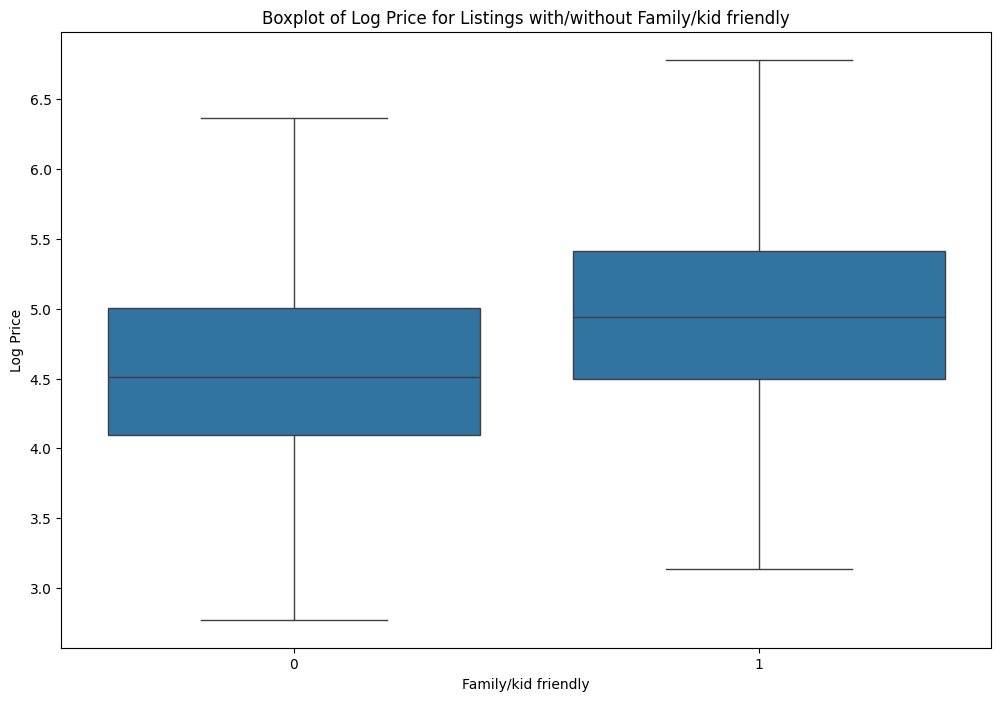

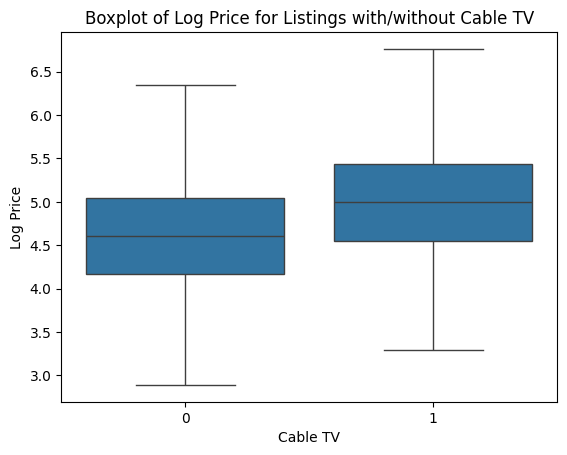

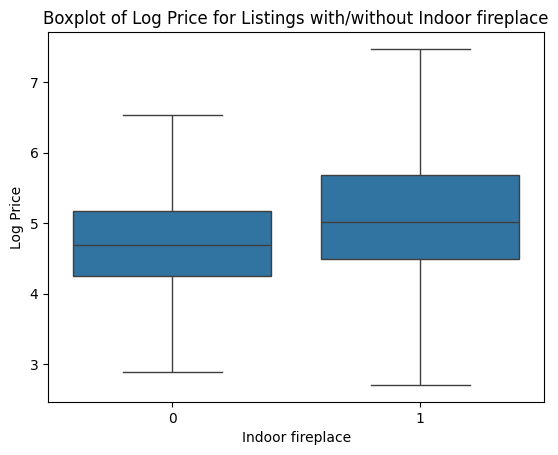

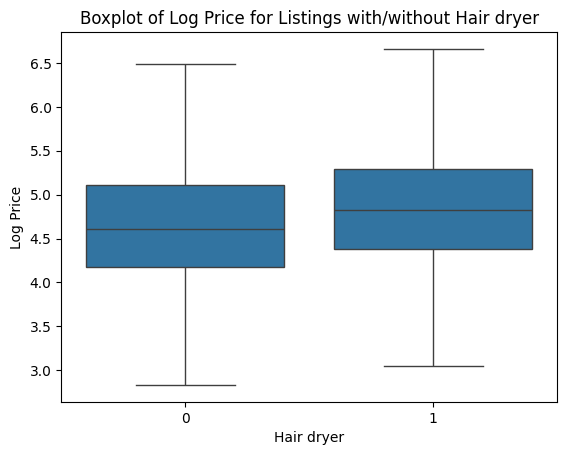

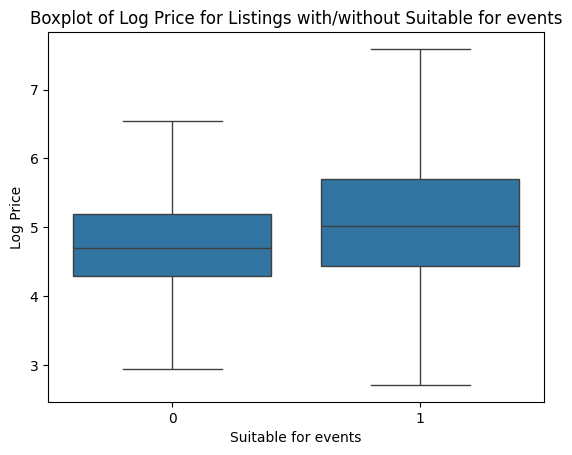

In [10]:
# Select amenities to visualize (e.g., top 5 correlated amenities)
amenities_to_visualize = amenities_corr_sorted.head(5).index

plt.figure(figsize=(12, 8))
for amenity in amenities_to_visualize:
    sns.boxplot(x=df[amenity], y=df['log_price'], showfliers=False)
    plt.title(f'Boxplot of Log Price for Listings with/without {amenity}')
    plt.xlabel(amenity)
    plt.ylabel('Log Price')
    plt.show()

In [ ]:
print(df['description_sentiment_vader'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Selecting relevant features
features = ['property_type_encoded', 'room_type_encoded', 'accommodates', 'bathrooms', 'bed_type_encoded',
            'cancellation_policy_encoded', 'cleaning_fee', 'Amenities_Count', 'description_sentiment_vader',
            'Host_Tenure', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'Days_Since_Last_Review',
            'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

# Splitting the data into training and testing sets
X = df[features]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputing missing values (Taking care of NaN values, replacing them with mean)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Baseline Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)
lr_preds = lr_model.predict(X_test_imputed)

# Complex Models: RandomForest and GradientBoosting
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)
rf_preds = rf_model.predict(X_test_imputed)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_imputed, y_train)
gb_preds = gb_model.predict(X_test_imputed)

# Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

print("Baseline Model (Linear Regression) Evaluation:")
lr_metrics = evaluate_model(y_test, lr_preds)
print("MAE:", lr_metrics[0])
print("MSE:", lr_metrics[1])
print("R-squared:", lr_metrics[2])

print("\nRandomForest Model Evaluation:")
rf_metrics = evaluate_model(y_test, rf_preds)
print("MAE:", rf_metrics[0])
print("MSE:", rf_metrics[1])
print("R-squared:", rf_metrics[2])

print("\nGradientBoosting Model Evaluation:")
gb_metrics = evaluate_model(y_test, gb_preds)
print("MAE:", gb_metrics[0])
print("MSE:", gb_metrics[1])
print("R-squared:", gb_metrics[2])


Baseline Model (Linear Regression) Evaluation:
MAE: 0.37082964823609815
MSE: 0.24182199785981917
R-squared: 0.5292781646139237

RandomForest Model Evaluation:
MAE: 0.2804027793013965
MSE: 0.1515191821840152
R-squared: 0.705058314937907

GradientBoosting Model Evaluation:
MAE: 0.3013057145457424
MSE: 0.17068526344855448
R-squared: 0.6677503238128295


In [12]:
from sklearn.model_selection import GridSearchCV, KFold

# Defining hyperparameters for RandomForest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 3]
}

# Defining hyperparameters for GradientBoosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5]
}

# Performing grid search with k-fold cross-validation for RandomForest
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid,
                              scoring='neg_mean_squared_error',
                              cv=KFold(n_splits=3, shuffle=True, random_state=42),
                              n_jobs=-1)
rf_grid_search.fit(X_train_imputed, y_train)

#for GradientBoosting
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=gb_param_grid,
                              scoring='neg_mean_squared_error',
                              cv=KFold(n_splits=3, shuffle=True, random_state=42),
                              n_jobs=-1)
gb_grid_search.fit(X_train_imputed, y_train)

# Getting the best hyperparameters for RandomForest and GradientBoosting
best_rf_params_grid = rf_grid_search.best_params_
best_gb_params_grid = gb_grid_search.best_params_

# Training the optimized models with GridSearchCV
optimized_rf_model_grid = RandomForestRegressor(random_state=42, **best_rf_params_grid)
optimized_rf_model_grid.fit(X_train_imputed, y_train)

optimized_gb_model_grid = GradientBoostingRegressor(random_state=42, **best_gb_params_grid)
optimized_gb_model_grid.fit(X_train_imputed, y_train)

#Evaluation of optimized models
rf_preds_optimized_grid = optimized_rf_model_grid.predict(X_test_imputed)
gb_preds_optimized_grid = optimized_gb_model_grid.predict(X_test_imputed)

print("Optimized RandomForest Model Evaluation (GridSearchCV):")
rf_metrics_optimized_grid = evaluate_model(y_test, rf_preds_optimized_grid)
print("MAE:", rf_metrics_optimized_grid[0])
print("MSE:", rf_metrics_optimized_grid[1])
print("R-squared:", rf_metrics_optimized_grid[2])

print("\nOptimized GradientBoosting Model Evaluation (GridSearchCV):")
gb_metrics_optimized_grid = evaluate_model(y_test, gb_preds_optimized_grid)
print("MAE:", gb_metrics_optimized_grid[0])
print("MSE:", gb_metrics_optimized_grid[1])
print("R-squared:", gb_metrics_optimized_grid[2])


Optimized RandomForest Model Evaluation (GridSearchCV):
MAE: 0.2979206672359353
MSE: 0.1671382749607394
R-squared: 0.674654761563962

Optimized GradientBoosting Model Evaluation (GridSearchCV):
MAE: 0.29899770337832277
MSE: 0.1676255754144712
R-squared: 0.673706200366076


In [13]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


100%|===================| 59276/59288 [22:46<00:00]       

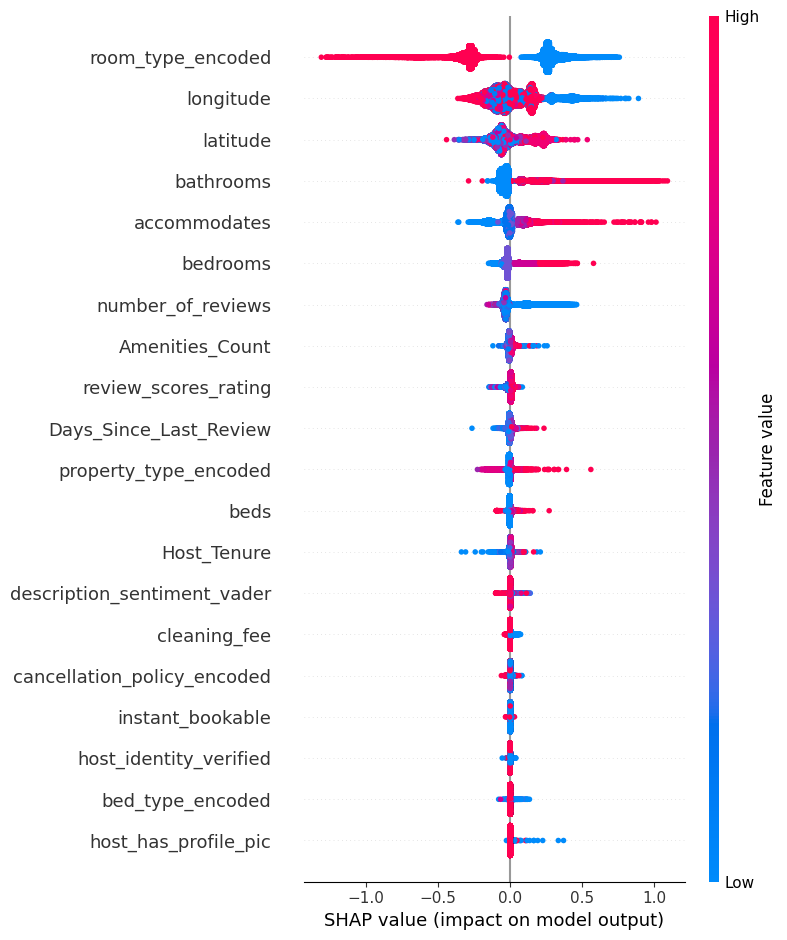

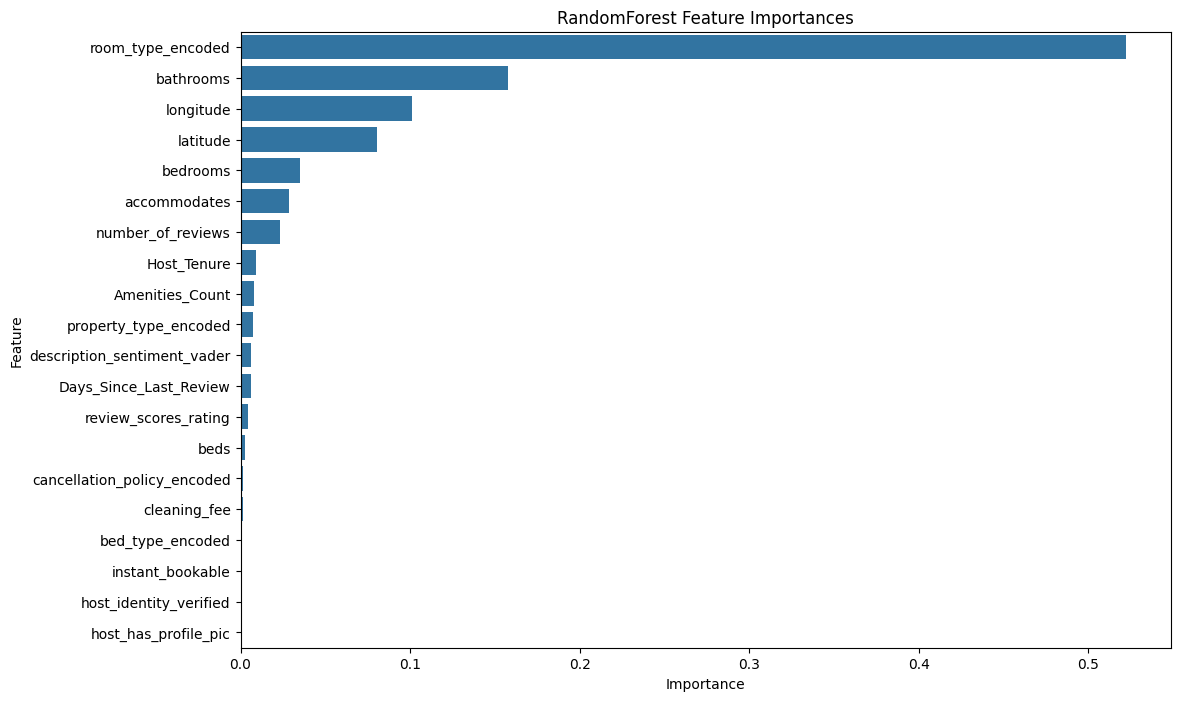

100%|===================| 59194/59288 [04:40<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 4.250501, while the model output was 4.188648. If this difference is acceptable you can set check_additivity=False to disable this check.

In [19]:
import shap
# Initialize SHAP explainer for RandomForest
rf_explainer = shap.Explainer(optimized_rf_model_grid, X_train_imputed)
rf_shap_values = rf_explainer.shap_values(X_train_imputed)

X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Plot SHAP summary plot for RandomForest
shap.summary_plot(rf_shap_values, X_train_imputed_df, feature_names=X_train.columns)

# feature importances
rf_feature_importances = optimized_rf_model_grid.feature_importances_
rf_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('RandomForest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#GradientBoosting
gb_explainer = shap.Explainer(optimized_gb_model_grid, X_train_imputed)
gb_shap_values = gb_explainer.shap_values(X_train_imputed)

shap.summary_plot(gb_shap_values, X_train_imputed_df, feature_names=X_train.columns)
gb_feature_importances = optimized_gb_model_grid.feature_importances_
gb_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_feature_importances})
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)
# Visualization of GradientBoosting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance_df)
plt.title('GradientBoosting Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [17]:
# Calculating RMSE for both models separately here again
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model_performance(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r_squared = r2_score(y_true, y_pred)
    return rmse, r_squared

rf_rmse, rf_r_squared = evaluate_model_performance(y_test, rf_preds_optimized_grid)
gb_rmse, gb_r_squared = evaluate_model_performance(y_test, gb_preds_optimized_grid)

print("RandomForest Model Evaluation on Test Set:")
print("RMSE:", rf_rmse)
print("R-squared:", rf_r_squared)

print("\nGradientBoosting Model Evaluation on Test Set:")
print("RMSE:", gb_rmse)
print("R-squared:", gb_r_squared)


RandomForest Model Evaluation on Test Set:
RMSE: 0.40882548227910087
R-squared: 0.674654761563962

GradientBoosting Model Evaluation on Test Set:
RMSE: 0.4094210246365851
R-squared: 0.673706200366076


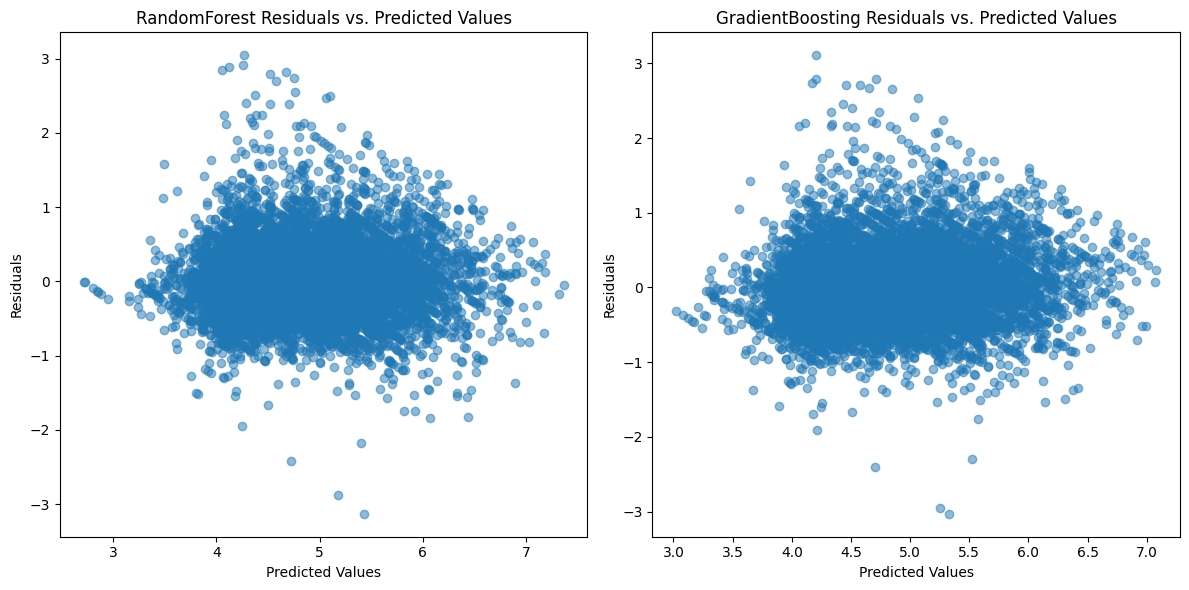

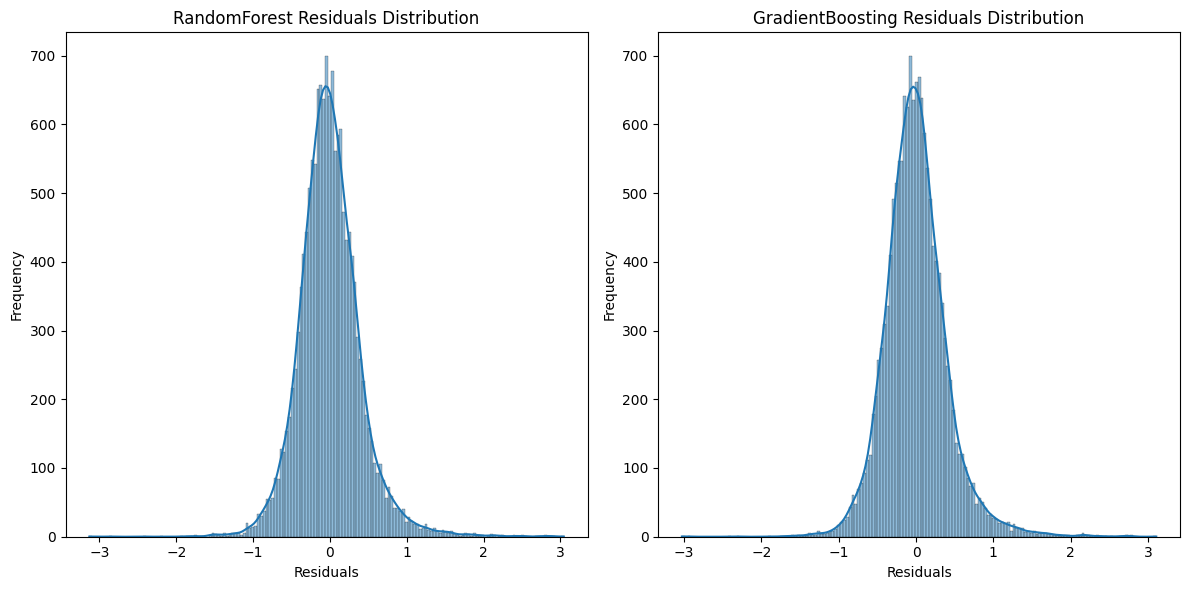

In [18]:
# Calculate residuals
rf_residuals = y_test - rf_preds_optimized_grid
gb_residuals = y_test - gb_preds_optimized_grid

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(rf_preds_optimized_grid, rf_residuals, alpha=0.5)
plt.title('RandomForest Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(gb_preds_optimized_grid, gb_residuals, alpha=0.5)
plt.title('GradientBoosting Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(rf_residuals, kde=True)
plt.title('RandomForest Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(gb_residuals, kde=True)
plt.title('GradientBoosting Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
